# Feature Engineering

In [1]:
# Environment variables
from dotenv import load_dotenv
load_dotenv("mysql.env")

import os
import sys
import mysql.connector

# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Engineering - Technical Analysis
from ta import add_all_ta_features
from ta.utils import dropna

# Feature Selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection, preprocessing
import xgboost as xgb

# ignore warnings from pandas
import warnings
warnings.filterwarnings('ignore')

# List of Stocks and ETFs
Provided by Thomas Choi.

In [2]:
stock_list = pd.read_csv("stocks_and_etfs/stock_list.csv")
etf_list = pd.read_csv("stocks_and_etfs/etf_list.csv")
exchange_list = ['HKEX', 'NYSE', 'NASDAQ', 'AMEX']

In [3]:
stock_symbol = stock_list.iloc[20,0]
stock_symbol

'VIAC'

# MySQL connection

In [4]:
HOST=os.environ.get("HOST")
PORT=os.environ.get("PORT")
USER=os.environ.get("USER")
PASSWORD=os.environ.get("PASSWORD")

try: 
    conn = mysql.connector.connect(
        host=HOST,
        port=PORT,
        user=USER,
        password=PASSWORD,
        database="GlobalMarketData"
    )
    query = f"SELECT Date, Close, Open, High, Low, Volume from histdailyprice3 WHERE Symbol='{stock_symbol}';"
    #query = f"SELECT Symbol, Date, Close, Open, High, Low, Volume from histdailyprice3 WHERE Exchange='{exchange_list[1]}';"
    histdailyprice3 = pd.read_sql(query, conn)
    conn.close()
except Exception as e:
    conn.close()
    print(str(e))

# Load Data

In [5]:
df = histdailyprice3.copy()
#df.set_index("Date", drop=True, inplace=True)

# Clean NaN values
df = dropna(df)

# Stock Dataset with Technical Analysis

In [6]:
df = add_all_ta_features(df, open="Open", high="High", low="Low", close="Close", volume="Volume", fillna=True)

In [7]:
df.head()

,Date,Close,Open,High,Low,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,...,momentum_wr,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr
0,2005-01-21,11.00,11.75,7.95,8.685,7755514.0,-5.660998e+07,7755514.0,-7.299320,0.000000e+00,...,-414.965986,0.0,11.000000,0.0,0.000000,0.000000,0.000000,-33.871685,0.000000,0.000000
1,2005-01-24,8.95,9.47,8.70,9.120,1503913.0,-5.689644e+07,6251601.0,-6.144704,-3.083022e+06,...,1666.666667,0.0,10.141129,0.0,-6.838640,-1.367728,-5.470912,-18.636364,-20.624174,-18.636364
2,2005-01-25,9.55,12.70,9.18,12.020,3215378.0,-5.451887e+07,9466979.0,-4.370318,-2.366986e+06,...,74.747475,0.0,9.904728,0.0,-10.689112,-3.232005,-7.457108,6.703911,6.488762,-13.181818
3,2005-01-26,13.35,14.60,10.80,11.040,5563847.0,-1.671868e+08,15030826.0,-9.268252,9.915288e+05,...,120.567376,0.0,10.813850,0.0,-10.836405,-4.752885,-6.083520,39.790576,33.497523,21.363636
4,2005-01-27,10.66,11.35,9.83,10.050,2353167.0,-1.825893e+08,12677659.0,-8.954048,-5.440663e+04,...,-6.619385,0.0,10.774009,0.0,-15.159006,-6.834109,-8.324897,-20.149813,-22.501797,-3.090909


In [8]:
df.columns

Index(['Date', 'Close', 'Open', 'High', 'Low', 'Volume', 'volume_adi',
       'volume_obv', 'volume_cmf', 'volume_fi', 'volume_mfi', 'volume_em',
       'volume_sma_em', 'volume_vpt', 'volume_nvi', 'volume_vwap',
       'volatility_atr', 'volatility_bbm', 'volatility_bbh', 'volatility_bbl',
       'volatility_bbw', 'volatility_bbp', 'volatility_bbhi',
       'volatility_bbli', 'volatility_kcc', 'volatility_kch', 'volatility_kcl',
       'volatility_kcw', 'volatility_kcp', 'volatility_kchi',
       'volatility_kcli', 'volatility_dcl', 'volatility_dch', 'volatility_dcm',
       'volatility_dcw', 'volatility_dcp', 'volatility_ui', 'trend_macd',
       'trend_macd_signal', 'trend_macd_diff', 'trend_sma_fast',
       'trend_sma_slow', 'trend_ema_fast', 'trend_ema_slow', 'trend_adx',
       'trend_adx_pos', 'trend_adx_neg', 'trend_vortex_ind_pos',
       'trend_vortex_ind_neg', 'trend_vortex_ind_diff', 'trend_trix',
       'trend_mass_index', 'trend_cci', 'trend_dpo', 'trend_kst',
       'tr

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1124 entries, 0 to 1161
Data columns (total 89 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       1124 non-null   object 
 1   Close                      1124 non-null   float64
 2   Open                       1124 non-null   float64
 3   High                       1124 non-null   float64
 4   Low                        1124 non-null   float64
 5   Volume                     1124 non-null   float64
 6   volume_adi                 1124 non-null   float64
 7   volume_obv                 1124 non-null   float64
 8   volume_cmf                 1124 non-null   float64
 9   volume_fi                  1124 non-null   float64
 10  volume_mfi                 1124 non-null   float64
 11  volume_em                  1124 non-null   float64
 12  volume_sma_em              1124 non-null   float64
 13  volume_vpt                 1124 non-null   float

In [10]:
# Descriptive statistics
df.describe()

,Close,Open,High,Low,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,volume_mfi,...,momentum_wr,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr
count,1124.000000,1124.000000,1124.000000,1124.000000,1.124000e+03,1.124000e+03,1.124000e+03,1124.000000,1.124000e+03,1124.000000,...,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000
mean,16.634327,16.998821,16.216437,16.598891,6.368148e+06,-3.194494e+08,-6.433874e+07,-5.834508,-4.398003e+06,51.656557,...,-32.427277,0.391482,16.577363,5.779590,-3.516326,-3.483439,-0.032887,0.451871,0.118239,51.221153
std,16.669061,17.101092,16.250944,16.691785,1.451536e+07,1.992082e+07,1.965061e+08,5.880422,4.577712e+07,20.076531,...,69.400494,5.989693,16.480865,49.238463,19.606289,17.004885,8.725381,14.694226,6.855726,151.536922
min,3.680000,3.720000,3.560000,3.660000,1.680000e+04,-3.226996e+08,-6.960205e+08,-46.962864,-7.403318e+08,0.000000,...,-414.965986,-25.884737,3.945080,-55.763994,-69.852645,-63.581800,-23.464178,-33.871685,-33.592486,-66.545455
25%,5.347500,5.490000,5.235000,5.330000,1.374295e+05,-3.226864e+08,-5.640846e+07,-6.638736,-1.506666e+04,36.173431,...,-77.788400,-0.498126,5.402529,-7.786027,-12.947378,-10.782003,-4.640794,-1.993854,-2.009279,-51.386364
50%,7.220000,7.245000,7.130000,7.200000,2.868820e+05,-3.226864e+08,2.954816e+06,-4.513295,1.472039e+03,50.718567,...,-29.629630,-0.023059,7.218502,0.000000,-3.208875,-2.576071,-0.989282,0.000000,0.000000,-34.363636
75%,27.500000,28.115000,27.101250,27.685000,9.300975e+06,-3.226864e+08,8.144266e+06,-2.445197,1.024396e+05,65.255961,...,3.373756,0.850085,26.827731,7.569035,6.828985,5.809818,3.285488,1.781983,1.766292,150.000000
max,99.150000,101.970000,96.210000,100.340000,2.165741e+08,-5.451887e+07,4.869981e+08,0.624604,8.222377e+07,100.000000,...,1666.666667,30.060453,90.612185,493.655172,85.155020,42.651885,71.869954,465.517241,173.257060,801.363636


# Feature Engineering

In [11]:
for f in df.columns:
    if df[f].dtype=='object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(df[f].values)) 
        df[f] = lbl.transform(list(df[f].values))
dtype_df = df.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,1
1,float64,88


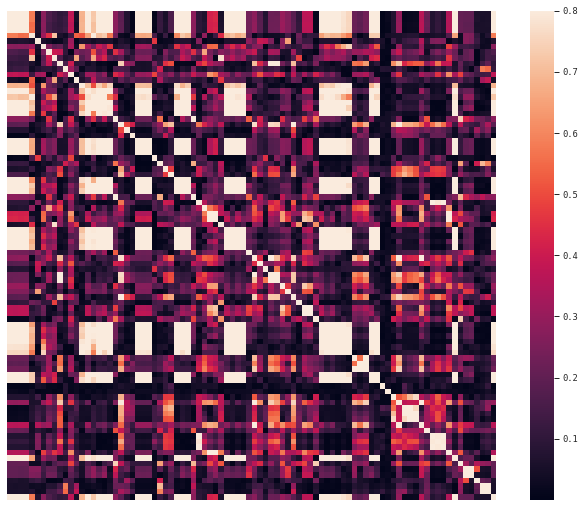

In [12]:
corrmat = df.drop(["Date"], axis=1).corr(method='pearson', min_periods=1000)
# plot absolute values
corrmat = np.abs(corrmat)
sns.set(context="paper", font="monospace")
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, xticklabels = False, yticklabels = False)
plt.show()

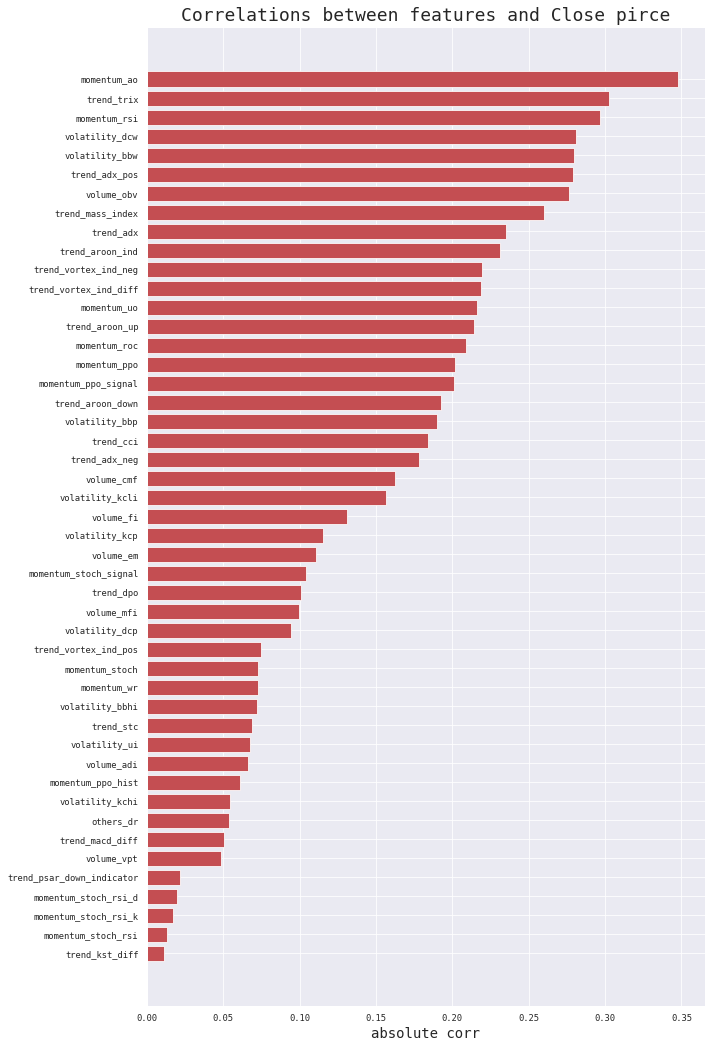

In [13]:
remain_num = 50
corr_target = corrmat['Close'].reset_index()[:-2]
corr_target.columns = ['feature','abs_corr']
corr_target = corr_target.sort_values(by = 'abs_corr', ascending = True)[:remain_num].loc[corr_target['abs_corr'] >0.01]
ind = np.arange(corr_target.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(10,18))
rects = ax.barh(ind, corr_target.abs_corr.values, color='r')
ax.set_yticks(ind)
ax.set_yticklabels(corr_target.feature.values, rotation='horizontal')
ax.set_xlabel("absolute corr", fontsize = 14)
ax.set_title("Correlations between features and Close pirce", fontsize = 18)
plt.show()

In [14]:
corr_target_f = list(corr_target.feature.values)

# Correlation between features

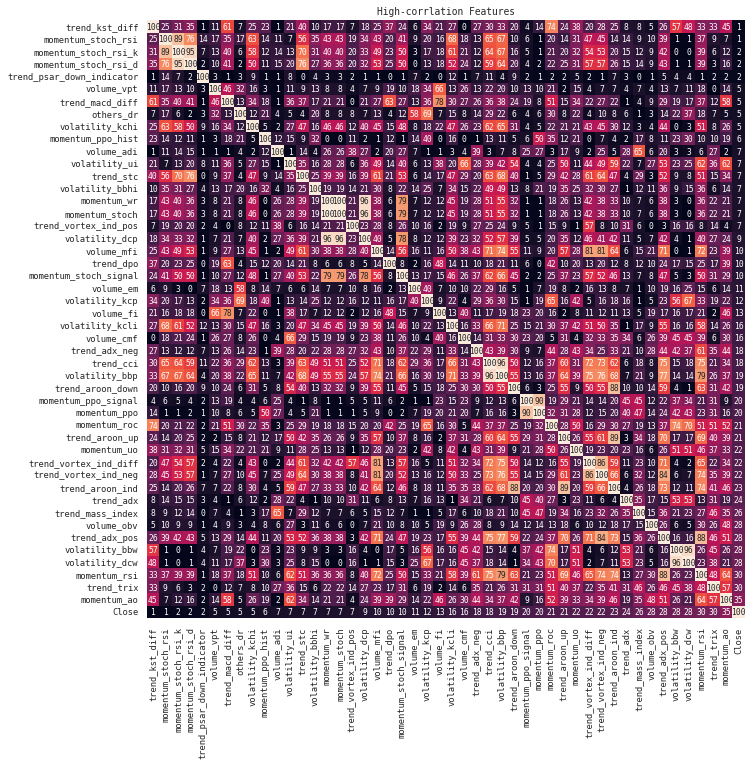

In [15]:
corr_target_f2 = corr_target_f
corr_target_f2.append('Close')
high_corr = df[corr_target_f2].corr(method='pearson', min_periods=1000)
high_corr = np.abs(high_corr)*100
f, ax = plt.subplots(figsize=(11, 11))
sns.heatmap(high_corr, cbar=False, annot=True, square=True, fmt='.0f', 
            annot_kws={'size': 8})
plt.title('High-corrlation Features')
plt.show()

# Feature Selection